In [1]:
import skimage.io, skimage.color, skimage.filters, skimage.morphology, skimage.measure
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from skimage.transform import resize

c:\Users\donm\Anaconda3\envs\img_processing\lib\site-packages\skimage\_shared\utils.py:348: RuntimeWarning: Images with dimensions (M, N, 3) are interpreted as 2D+RGB by default. Use `multichannel=False` to interpret as 3D image with last dimension of length 3.
  return func(*args, **kwargs)


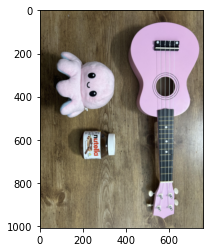

In [2]:
img = skimage.io.imread('../test/wood4.jpg')
img = resize(img, (img.shape[0] // 4, img.shape[1] // 4),
                       anti_aliasing=True)
img = skimage.filters.gaussian(img)
plt.imshow(img)

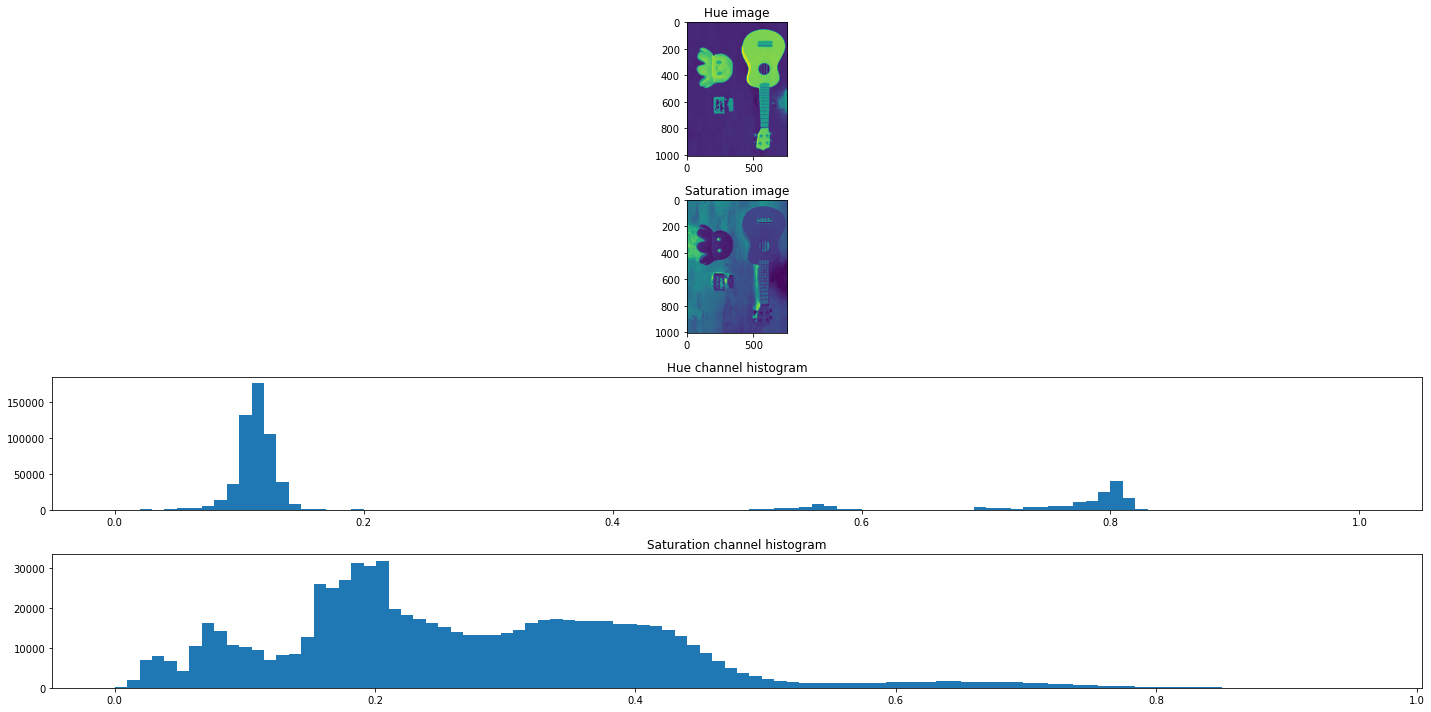

In [3]:
img_hsv = skimage.color.rgb2hsv(img)
h = img_hsv[:,:,0]
s = img_hsv[:,:,1]
fig, [ax1, ax2, ax3, ax4] = plt.subplots(4,1,figsize = (20,10))
ax1.imshow(h)
ax1.set_title("Hue image")
ax2.imshow(s)
ax2.set_title("Saturation image")
ax3.hist(np.copy(h).flatten(), bins = 100)
ax3.set_title("Hue channel histogram")
ax4.hist(np.copy(s).flatten(), bins = 100)
ax4.set_title("Saturation channel histogram")
plt.tight_layout()

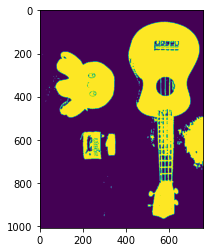

In [6]:
h_range = [0.05, 0.17]
s_range = [0.3, 0.5]
mask = (((h<h_range[0]) | (h>h_range[1])) & ((s<s_range[0]) | (s>s_range[1])))
plt.imshow(mask)

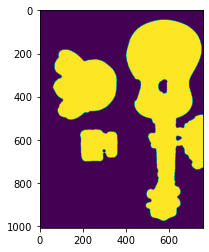

In [7]:
mask = skimage.filters.median(mask, np.ones((9,9)))

mask = skimage.morphology.binary_dilation(mask, skimage.morphology.disk(10))
mask = skimage.morphology.binary_opening(mask, skimage.morphology.disk(7))
mask = skimage.morphology.binary_closing(mask, skimage.morphology.disk(7))

plt.imshow(mask)

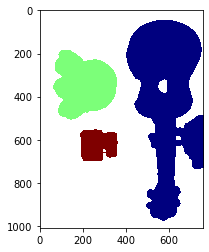

In [8]:
labels = skimage.measure.label(mask)
plt.imshow(np.where(labels!=0, labels, np.nan), cmap=plt.cm.jet, interpolation='nearest')

In [9]:
probs = skimage.measure.regionprops(labels)
bboxes = []
for prob in probs:
  if prob.area_filled < 15000: continue
  bboxes.append(prob.bbox)
  
bboxes

[(45, 397, 975, 756), (183, 60, 507, 354), (551, 185, 700, 358)]

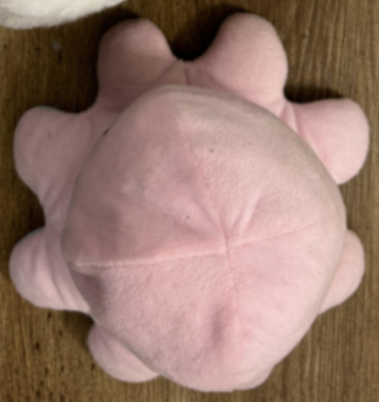

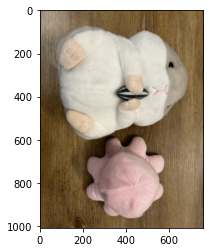

In [65]:
pil_img = Image.fromarray(np.uint8(img*255))
plt.imshow(img)
for i, bbox in enumerate(bboxes):
  crop = pil_img.crop(bbox[1::-1] + bbox[-1:1:-1])
  crop.save(f'obj_{i+1}.jpg')
  # plt.imshow(crop)
crop